**Name** - Aditya Singh Tomar

---

**Task** - House Price Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
house_data=pd.read_csv('/content/Housing.csv')

In [ ]:
house_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
house_data_subset = pd.DataFrame(house_data['price'])


In [ ]:
from sklearn.datasets import fetch_california_housing
price = fetch_california_housing()
house_data = pd.DataFrame(price.data, columns=price.feature_names)


In [ ]:
house_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
house_data.shape

(20640, 8)

In [ ]:
house_data.sum()

MedInc        7.989065e+04
HouseAge      5.911190e+05
AveRooms      1.120546e+05
AveBedrms     2.263538e+04
Population    2.942184e+07
AveOccup      6.337832e+04
Latitude      7.354416e+05
Longitude    -2.467919e+06
dtype: float64

In [ ]:
house_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


<Axes: >

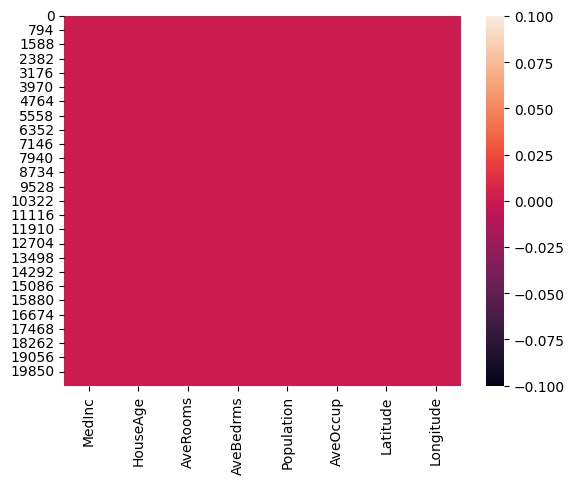

In [ ]:
sns.heatmap(house_data.isnull())

In [ ]:
correlation = house_data.corr()

<Axes: >

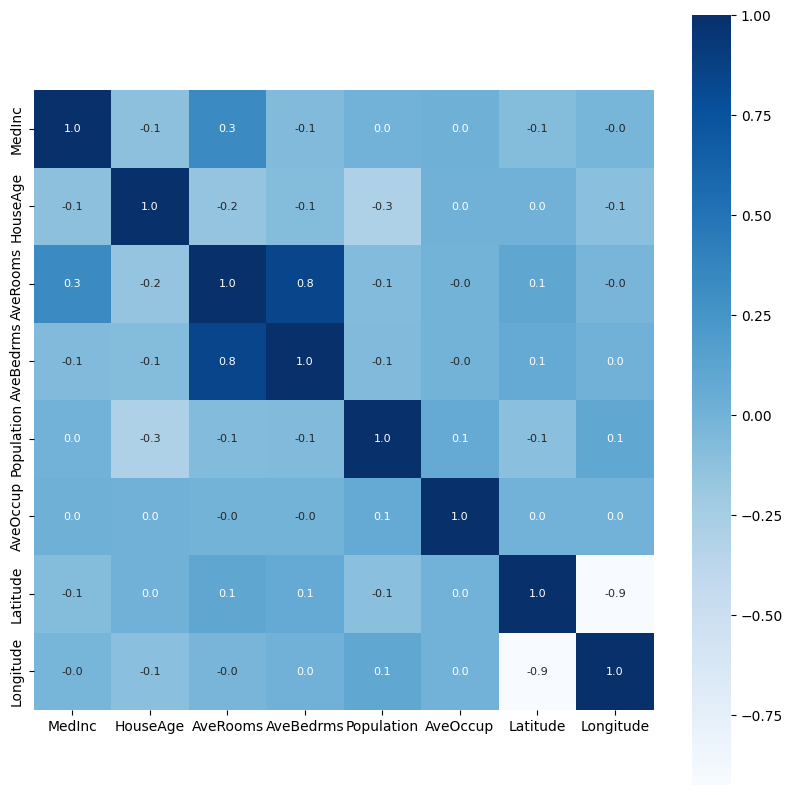

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
house_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
print(house_data.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [ ]:
X = house_data.drop(['MedInc'], axis=1)
Y = house_data['MedInc']

In [ ]:
print(X,Y)

       HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0          41.0  6.984127   1.023810       322.0  2.555556     37.88   
1          21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2          52.0  8.288136   1.073446       496.0  2.802260     37.85   
3          52.0  5.817352   1.073059       558.0  2.547945     37.85   
4          52.0  6.281853   1.081081       565.0  2.181467     37.85   
...         ...       ...        ...         ...       ...       ...   
20635      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
house_data.shape

(20640, 8)

In [ ]:
X_train.shape

(16512, 7)

In [ ]:
X_test.shape

(4128, 7)

In [ ]:
Y_train.shape

(16512,)

In [ ]:
Y_test.shape

(4128,)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[2.2280567  5.18312522 2.63988592 ... 3.31898776 1.91374157 2.89016771]


In [ ]:
score1 = metrics.r2_score(Y_train, training_data_prediction)
score2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
score3 = metrics.mean_squared_error(Y_train, training_data_prediction)
print("R squared error : ", score1)
print('Mean Absolute Error : ', score2)
print('Mean Squared Error : ', score3)

R squared error :  0.615156394903478
Mean Absolute Error :  0.795235277567298
Mean Squared Error :  1.379338735393577


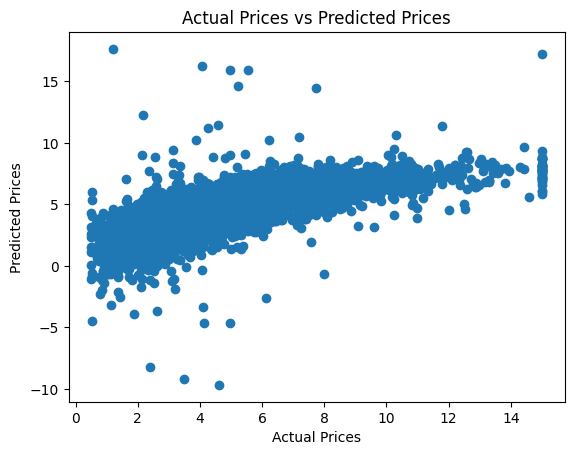

In [ ]:

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)



[6.61319963 3.99138534 3.18591896 ... 2.32303705 2.76085476 4.73686689]


In [ ]:
score1 = metrics.mean_absolute_error(Y_test,test_data_prediction)
score2 = metrics.mean_squared_error(Y_test,test_data_prediction)
score3 = np.sqrt(metrics.mean_squared_error(Y_test,test_data_prediction))

print(score1)
print(score2)
print(score3)

0.8311510472777094
1.7856682290728023
1.336288976633723


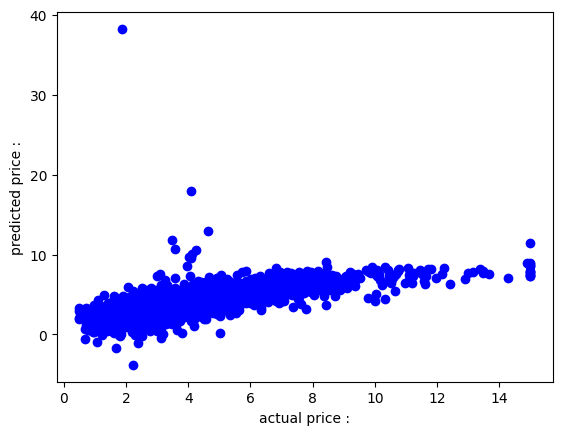

In [ ]:
plt.scatter(Y_test,test_data_prediction,color='b')
plt.xlabel('actual price :')
plt.ylabel('predicted price :')
plt.show()
plt.show()